Average Reward: -280544.858001709
Average Robot Arm Angle: 172.9681854248047


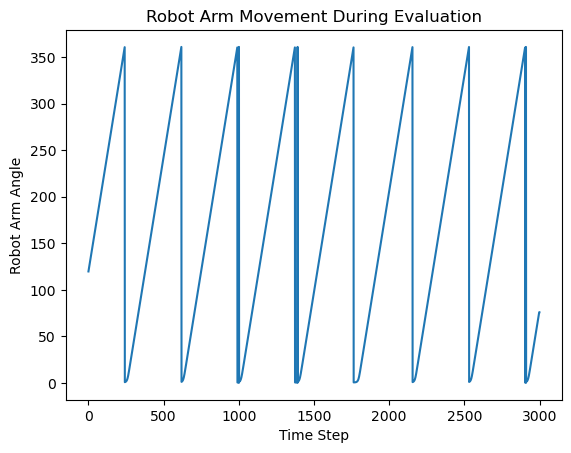

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from DDPG_Robot_Arm import RobotArmModel, ActorNet, CriticNet

def evaluate_model():
    # 모델 및 환경 초기화
    state_dim = 1
    action_dim = 1

    # Actor 모델 생성
    actor_net = ActorNet(state_dim, action_dim)

    # Critic 모델 생성
    critic_net = CriticNet(state_dim, action_dim)

    # 저장된 모델 로드
    actor_checkpoint = torch.load("./best_actor_model.pth")
    critic_checkpoint = torch.load("./best_critic_model.pth")

    # 모델에 state_dict 로드
    actor_net.load_state_dict(actor_checkpoint['actor_state_dict'])
    critic_net.load_state_dict(critic_checkpoint['target_critic_state_dict'])

    # 테스트 환경 초기화
    robot_arm = RobotArmModel()
    state = np.array([robot_arm.angle])
    episode_reward = 0

    # 에피소드 중 팔 각도 기록
    episode_angles = []

    # 테스트 에피소드 실행
    for step in range(3000):
        # 액션 선택
        with torch.no_grad():
            action = actor_net(torch.from_numpy(state).float().unsqueeze(0)).numpy().flatten()

        # 환경에서 액션 수행 및 리워드 계산
        next_state = np.array([robot_arm.move(action)])
        done_reward = 50.0  # 보상 설정
        done_reward *= np.abs(robot_arm.angle - 180.0) < 5.0  # 종료 조건
        reward = -np.abs(robot_arm.angle - 180.0) + done_reward
        episode_reward += reward

        # 팔 각도 기록
        episode_angles.append(robot_arm.angle)

        state = next_state

        if done_reward > 0:
            # 종료 조건이 만족하면 종료하지 않고 계속 실행
            # break
            pass

    # 최종 에피소드의 평균 리워드 출력
    average_reward = episode_reward.mean()
    print(f"Average Reward: {average_reward}")
    
    # 최종 에피소드의 평균 팔 각도 출력
    average_angle = np.mean(episode_angles)
    print(f"Average Robot Arm Angle: {average_angle}")

    # 팔 각도 시각화
    plt.plot(episode_angles)
    plt.xlabel('Time Step')
    plt.ylabel('Robot Arm Angle')
    plt.title('Robot Arm Movement During Evaluation')
    plt.show()

if __name__ == "__main__":
    evaluate_model()
